<a href="https://colab.research.google.com/github/melikesifa/assignments/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialize

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

## Load Data

Remember the retail transactions data set that we used for customer segmentation...

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/online_shoppers_intention.csv')

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

There is no missing data

In [7]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


There are 10 numerical,  8 categorical variables.

Numerical variables: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay

Categorical variables: Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend, Revenue

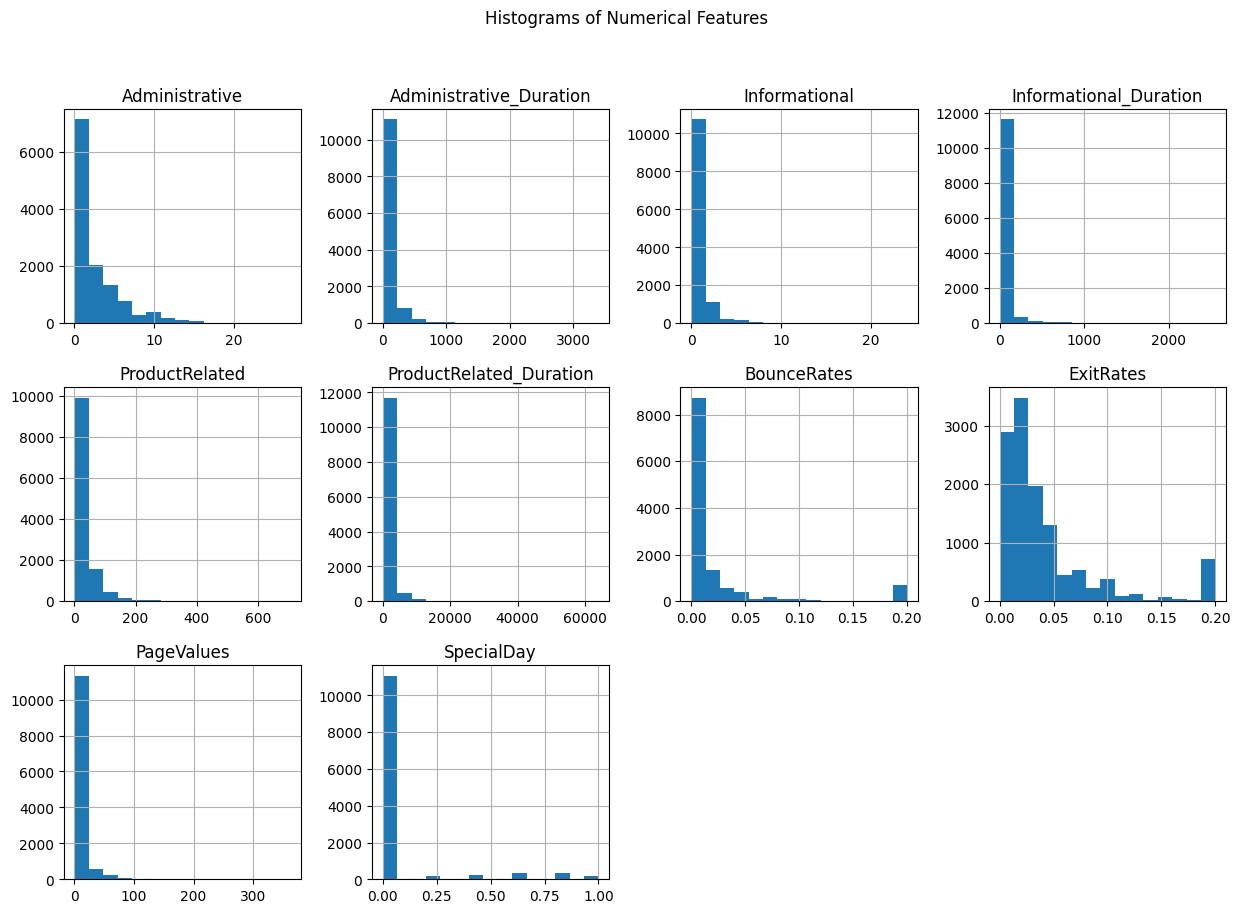

In [8]:
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational',
                      'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                      'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.suptitle('Histograms of Numerical Features')
plt.show()

There is not any significant interaction with administrative amd information related pages.

For product related visits, most of them are cumulated between 0,200 pages. It is a righ skewed histogram.

<ipython-input-9-05437baf4bf4>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Revenue'] == True][feature], label='Purchase', shade=True)
<ipython-input-9-05437baf4bf4>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Revenue'] == False][feature], label='No Purchase', shade=True)


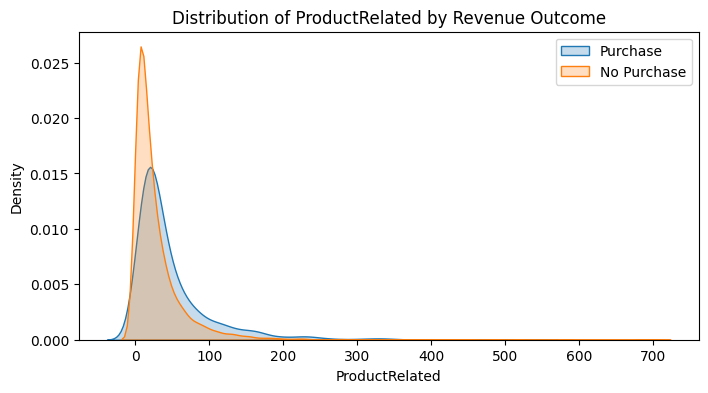

<ipython-input-9-05437baf4bf4>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Revenue'] == True][feature], label='Purchase', shade=True)
<ipython-input-9-05437baf4bf4>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Revenue'] == False][feature], label='No Purchase', shade=True)


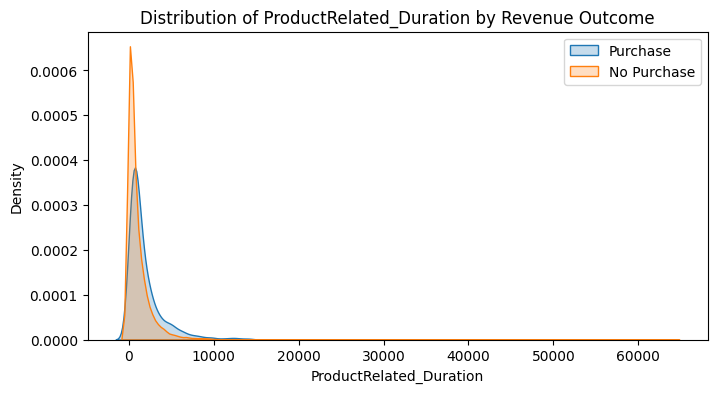

<ipython-input-9-05437baf4bf4>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Revenue'] == True][feature], label='Purchase', shade=True)
<ipython-input-9-05437baf4bf4>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Revenue'] == False][feature], label='No Purchase', shade=True)


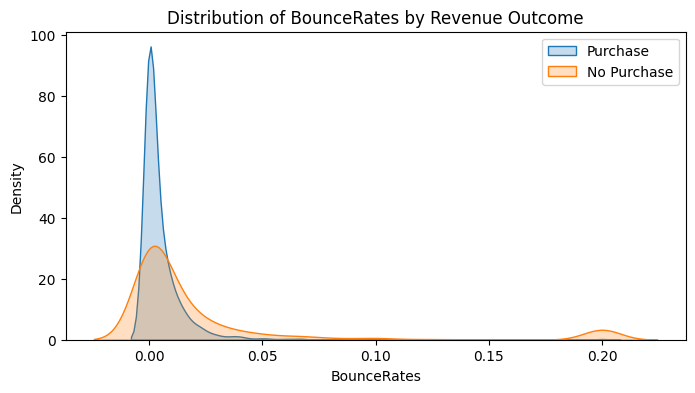

<ipython-input-9-05437baf4bf4>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Revenue'] == True][feature], label='Purchase', shade=True)
<ipython-input-9-05437baf4bf4>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Revenue'] == False][feature], label='No Purchase', shade=True)


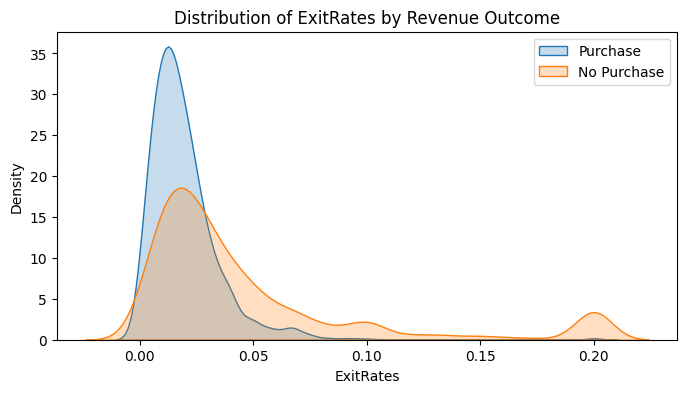

<ipython-input-9-05437baf4bf4>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Revenue'] == True][feature], label='Purchase', shade=True)
<ipython-input-9-05437baf4bf4>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Revenue'] == False][feature], label='No Purchase', shade=True)


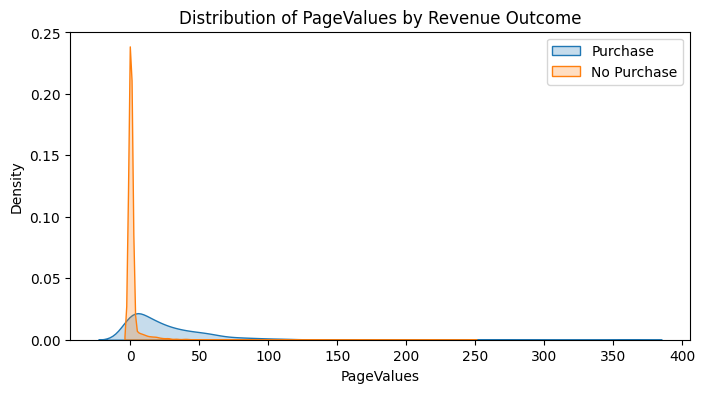

In [9]:
selected_features = ['ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']


for feature in selected_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[df['Revenue'] == True][feature], label='Purchase', shade=True)
    sns.kdeplot(df[df['Revenue'] == False][feature], label='No Purchase', shade=True)
    plt.title(f'Distribution of {feature} by Revenue Outcome')
    plt.legend()
    plt.show()

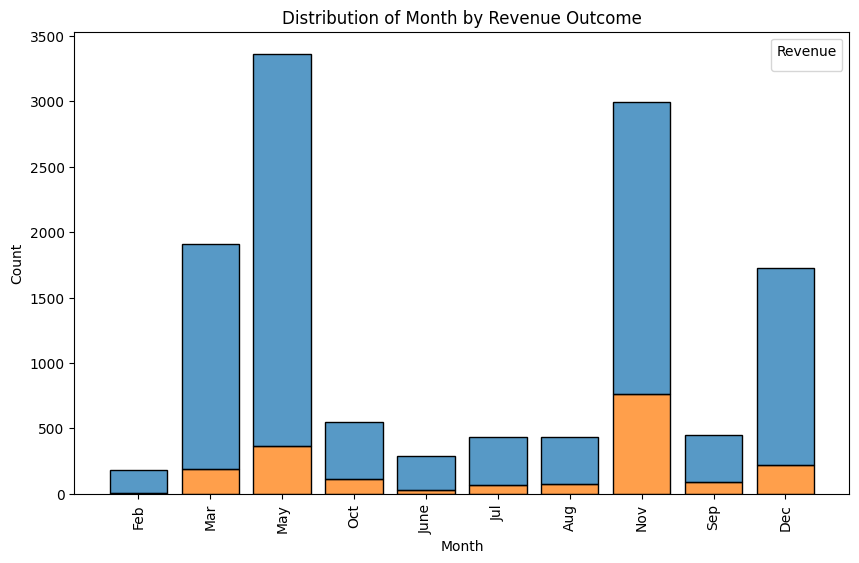

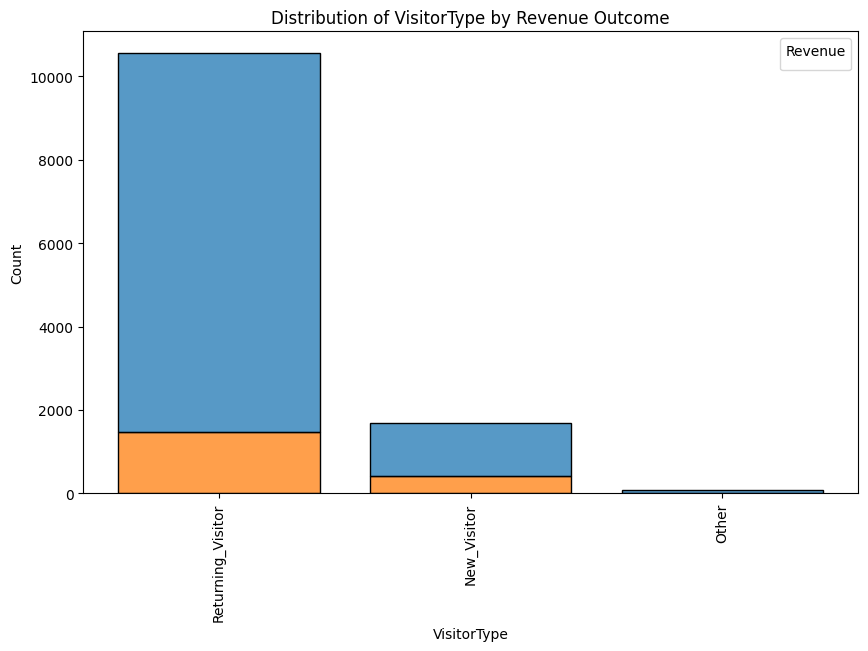

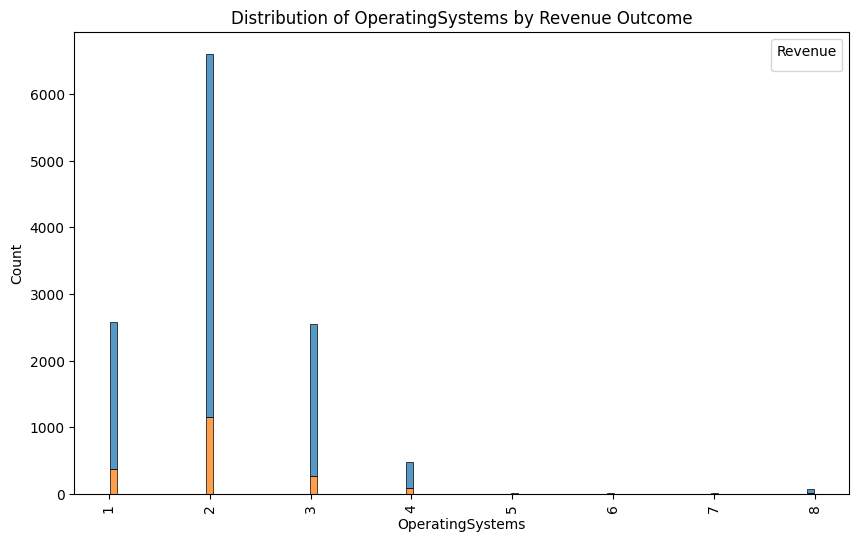

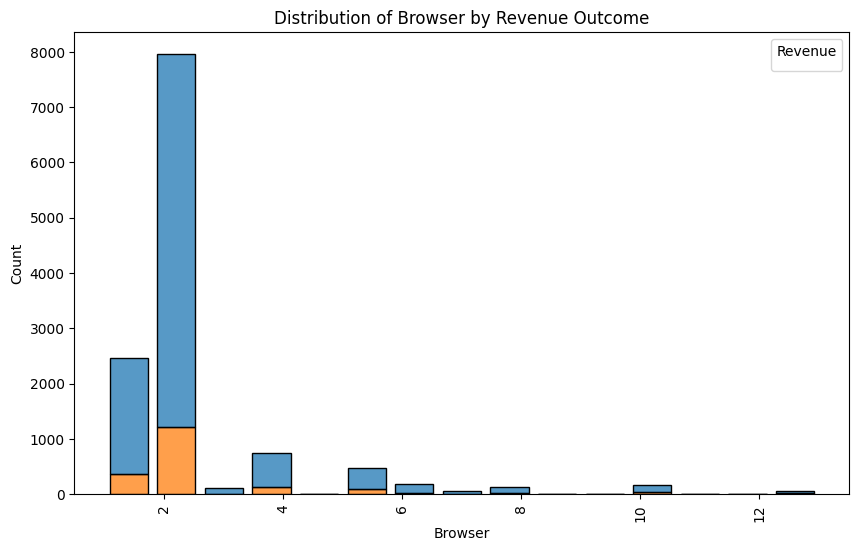

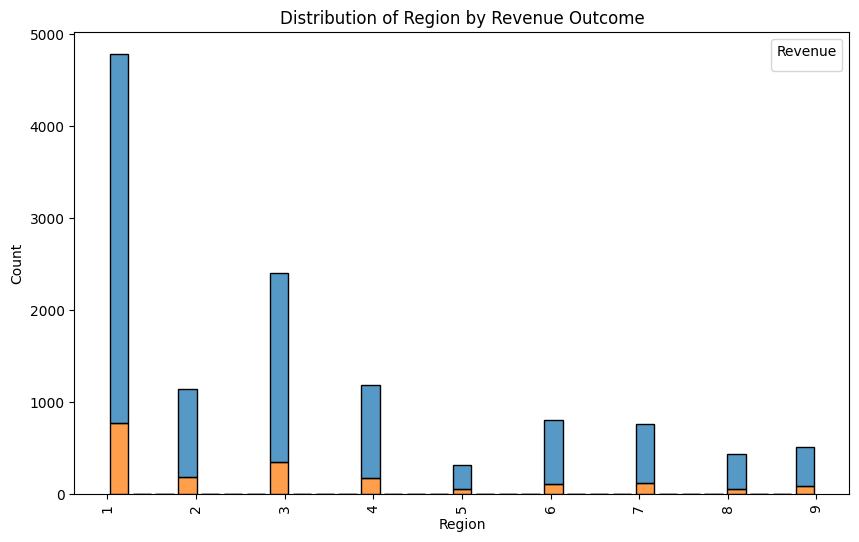

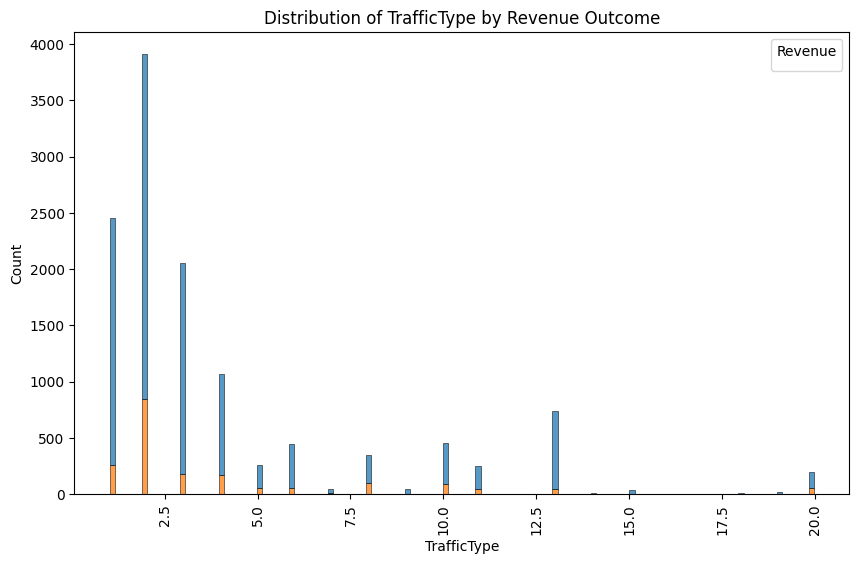

In [10]:
categorical_features = ['Month', 'VisitorType', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='Revenue', multiple='stack', shrink=0.8)
    plt.title(f'Distribution of {feature} by Revenue Outcome')
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Revenue', loc='upper right')
    plt.show()

At first I suspected a relation between month and specialday. but when I checked, actually there is not a significant impact of closeness to a speacial date to number of purchases.

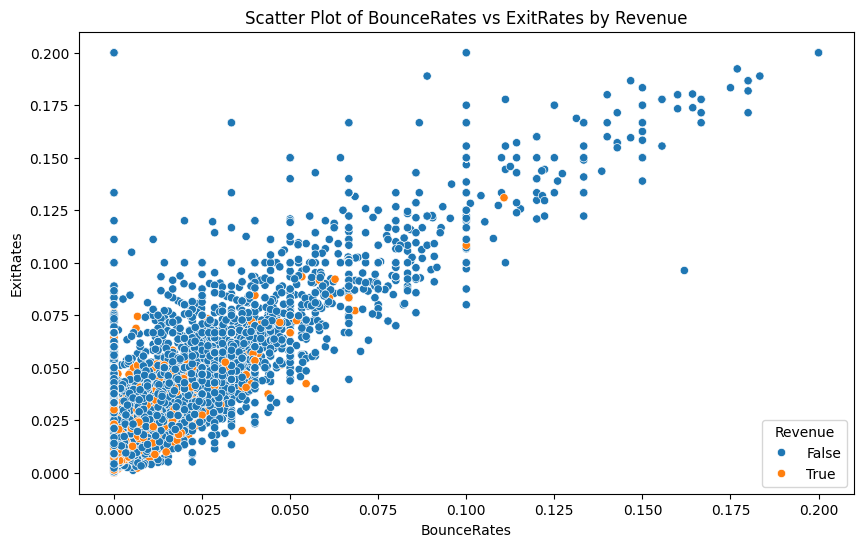

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BounceRates', y='ExitRates', hue='Revenue')
plt.title('Scatter Plot of BounceRates vs ExitRates by Revenue')
plt.xlabel('BounceRates')
plt.ylabel('ExitRates')
plt.legend(title='Revenue')
plt.show()

The successful sessions, generally have lower BounceRates and ExitRates.

In [12]:
scaler = StandardScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])

print(df[numerical_features].head())

   Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues  SpecialDay  
0     3.667189   3.229316   -0.317178   -0.308821  
1    -0.457683   1.171473   -0.317178   -0.308821  
2     3.667189   3.229316   -0.317178   -0.308821  
3   

I decided to use standardization for robustness.

## Prepare Data

In [13]:
df['Weekend'] = df['Weekend'].astype('category')

df['Weekend'] = df['Weekend'].cat.codes

In [14]:
visitor_dummies = pd.get_dummies(df['VisitorType'], prefix='VisitorType')
df = pd.concat([df, visitor_dummies], axis=1)

In [15]:
df['Month'] = df['Month'].replace({
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "June": 6,
    "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
})

# Optional: Apply cyclical encoding if seasonal trends are suspected
import numpy as np
df['month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

In [16]:
df['Revenue'] = df['Revenue'].astype('int64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  float64
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  float64
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  float64
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  Month                          12330 non-null  int64  
 11  OperatingSystems               12330 non-null  int64  
 12  Browser                        12330 non-null 

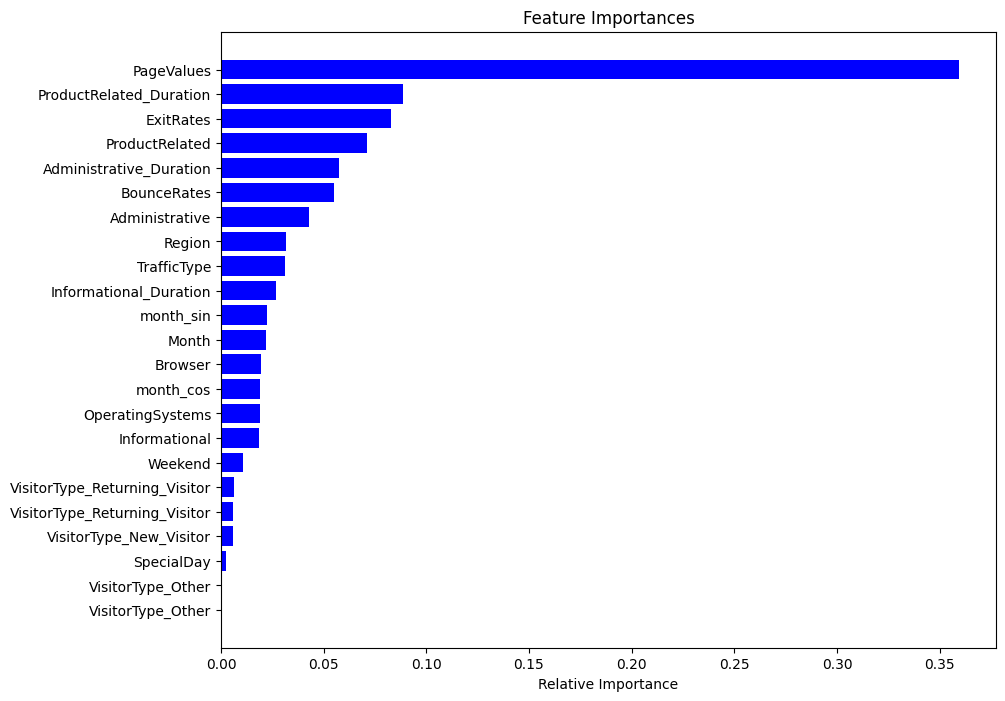

In [18]:
model = RandomForestClassifier(random_state=42)
# To convert categorical features to numerical
df = pd.get_dummies(df, columns=['VisitorType'], drop_first=True)

model.fit(df.drop('Revenue', axis=1), df['Revenue'])


importances = model.feature_importances_
features = df.drop('Revenue', axis=1).columns
indices = np.argsort(importances)


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Build Model

In [19]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 9864 samples
Testing set size: 2466 samples




*   Logistic Regression



In [26]:
log_reg = LogisticRegression(random_state=42, max_iter=2000)
log_reg.fit(X_train, y_train)


y_pred_log_reg = log_reg.predict(X_test)

from sklearn.metrics import roc_auc_score # Import the roc_auc_score function

roc_auc_log_reg = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("F1 Score:", f1_score(y_test, y_pred_log_reg))
print("ROC-AUC Score:", roc_auc_log_reg)


Logistic Regression Performance:
Accuracy: 0.8690186536901865
Precision: 0.7391304347826086
Recall: 0.3309002433090024
F1 Score: 0.4571428571428571
ROC-AUC Score: 0.8859964125241978




*   Decision Tree


In [28]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred_tree = decision_tree.predict(X_test)

y_pred_tree_prob = decision_tree.predict_proba(X_test)[:, 1]
roc_auc_tree = roc_auc_score(y_test, y_pred_tree_prob)

print("\nDecision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))
print("ROC-AUC Score:", roc_auc_tree)



Decision Tree Performance:
Accuracy: 0.8540145985401459
Precision: 0.5591647331786543
Recall: 0.5863746958637469
F1 Score: 0.5724465558194773
ROC-AUC Score: 0.7469586374695862




*   Random Forest



In [29]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

y_pred_forest = random_forest.predict(X_test)
roc_auc_forest = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])

print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Precision:", precision_score(y_test, y_pred_forest))
print("Recall:", recall_score(y_test, y_pred_forest))
print("F1 Score:", f1_score(y_test, y_pred_forest))
print("ROC-AUC Score:", roc_auc_forest)



Random Forest Performance:
Accuracy: 0.8921330089213301
Precision: 0.7543859649122807
Recall: 0.5231143552311436
F1 Score: 0.617816091954023
ROC-AUC Score: 0.9237027959815536




*   Support Vector Machine (SVM)



In [27]:
from sklearn.svm import SVC

# Initialize and train SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm.predict(X_test)

svm = SVC(kernel='linear', random_state=42, probability=True)
svm.fit(X_train, y_train)
y_pred_svm_prob = svm.predict_proba(X_test)[:, 1]
roc_auc_svm = roc_auc_score(y_test, y_pred_svm_prob)

print("\nSVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("ROC-AUC Score:", roc_auc_svm)



SVM Performance:
Accuracy: 0.8694241686942417
Precision: 0.7170731707317073
Recall: 0.35766423357664234
F1 Score: 0.47727272727272724
ROC-AUC Score: 0.8790991054990202




*   XGBoost



In [39]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Convert X_train to a NumPy array before fitting the model.
xgb_model.fit(X_train.values, y_train)  # Use .values to extract the NumPy array

# Convert X_test to a NumPy array before prediction
y_pred_xgb = xgb_model.predict(X_test.values)  # Use .values here as well
y_pred_xgb_prob = xgb_model.predict_proba(X_test.values)[:, 1]

# Evaluate the model (unchanged)
print("\nXGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_xgb_prob))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:16:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Performance:
Accuracy: 0.8905109489051095
Precision: 0.7104477611940299
Recall: 0.5790754257907542
F1 Score: 0.6380697050938338
ROC-AUC Score: 0.9209097743915796


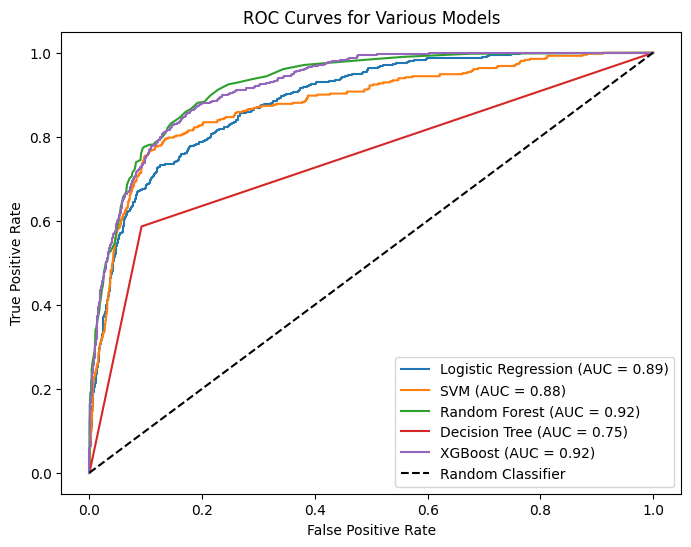

In [40]:
plt.figure(figsize=(8, 6))

# Calculate ROC curves for each model
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm_prob)
fpr_forest, tpr_forest, _ = roc_curve(y_test, random_forest.predict_proba(X_test)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb_prob)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb_prob)

# Plot each model's ROC curve
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_log_reg))
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.2f})'.format(roc_auc_svm))
plt.plot(fpr_forest, tpr_forest, label='Random Forest (AUC = {:.2f})'.format(roc_auc_forest))
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_tree))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(roc_auc_xgb))

#the random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Various Models')
plt.legend(loc='lower right')
plt.show()

Random Forest is the best performer with a 0.9237027959815536 ROC-AUC score.

# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

#parameter grid for random forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]        # Method for sampling data points (with or without replacement)
}
#it is taking too long,
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

This was taking too long, and even when ı tried to change the code to make it run faster, it didnt work. so I'll try another method

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

#parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_features': ['sqrt', 'log2', None],  # Updated to remove 'auto'
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

#RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                      n_iter=10,  # Reduce the number of iterations
                                      cv=3,       # Use fewer folds
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=-1)

# Fit RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

#best parameters and the corresponding score
print("Best parameters:", random_search_rf.best_params_)
print("Best score:", random_search_rf.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}
Best score: 0.9042984590429844


In [50]:
from sklearn.model_selection import cross_val_score

best_rf = RandomForestClassifier(
    n_estimators=400,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=40,
    bootstrap=True,
    random_state=42
)

# Perform cross-validation
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))


Cross-validation scores: [0.90724785 0.90522048 0.91332995 0.89913837 0.90669371]
Mean cross-validation score: 0.9063260713342085


The best score (0.9042984590429844) is the highest mean cross-validation accuracy achieved by the best Random Forest model.

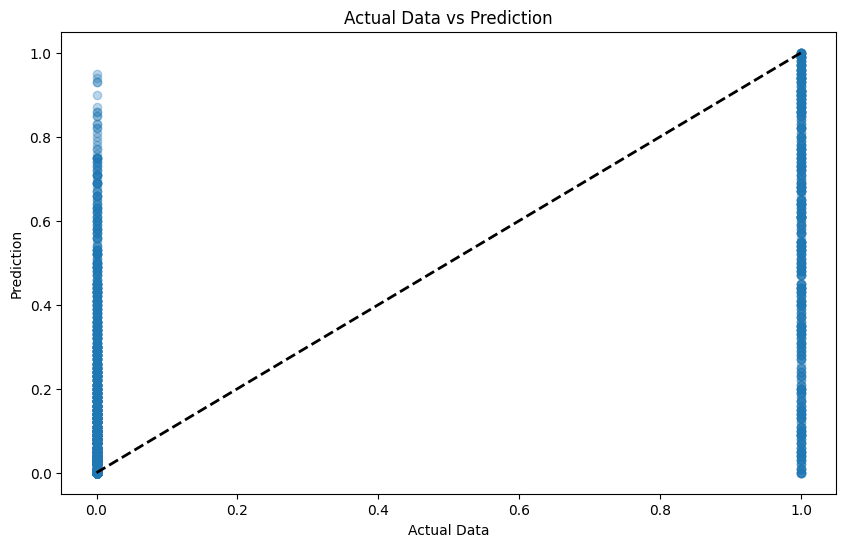

Mean Squared Error: 0.07254676939713436


In [78]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Example data loading and preparation
# X, y = load_your_data()  # Load your dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train your RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
predictions = rf.predict(X_test)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.3)  # Plot the actual vs. predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Ideal line
plt.xlabel('Actual Data')
plt.ylabel('Prediction')
plt.title('Actual Data vs Prediction')
plt.show()

# Optionally, calculate and display the mean squared error or another accuracy metric
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Since the output is either 0 or 1 the plot looks like this. So maybe a boxplot will make more sense

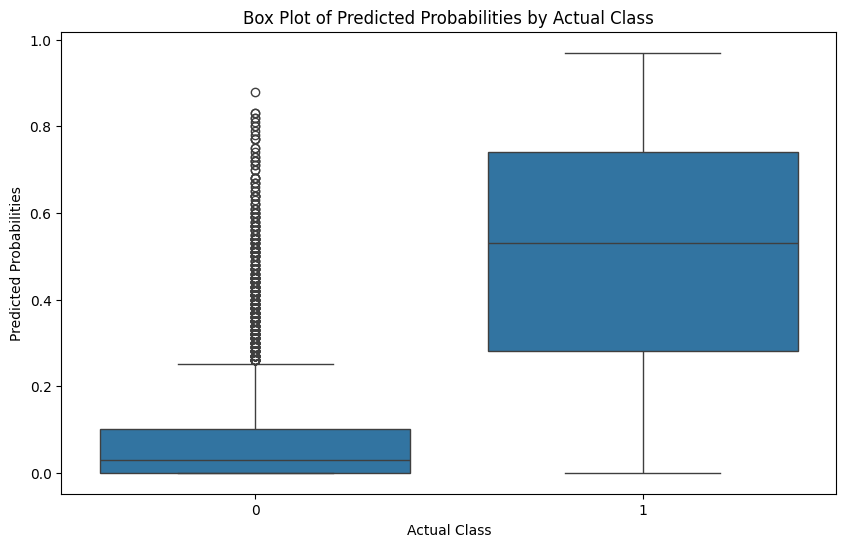

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

predictions = model.predict_proba(X_test)[:, 1]  # model predictions for the positive class
actuals = y_test  # actual labels

# Create a DataFrame
data = pd.DataFrame({
    'Predicted Probabilities': predictions,
    'Actual Class': actuals
})

# Creating box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Actual Class', y='Predicted Probabilities', data=data)
plt.title('Box Plot of Predicted Probabilities by Actual Class')
plt.show()


If we look at the class of 0, The outliers show the model predicted a high probability of being positive, despite the actual class being negative. This could be a sign of potential false positives or cases where the model is uncertain.

For class of 1, the median probability is above 0.5, which shows that for most of the actual positive instances, the model is confident in predicting them as positive.The absence of outliers above the box suggests there are no extreme cases of overconfidence beyond the expected range of probabilities.

# Insights and Conclusion

The model is highly confident when predicting negative outcomes, as evidenced by the low median and narrow IQR near 0 for Class 0. The model effectively identifies characteristics of the negative class.
The wide spread in class 1 implies inconsistency in how the model handles the positive prediction cases.adjusting the classification threshold could improve performance metrics like precision in this situation.

For hyperparameter tuning, due to my code taking to long to run, I was not able to do a precise job. Additionaly ı would have prefered to do hyperparameter tuning on XGBoost too. Since the R^2 scores were really close with Random Forest. Comparing them again would give more accurate results but ı wasnt successful at doing gridsearch on xgboost.
